# Introduction to Regresion with Neural Networks in Tensorflow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter predicting a number

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

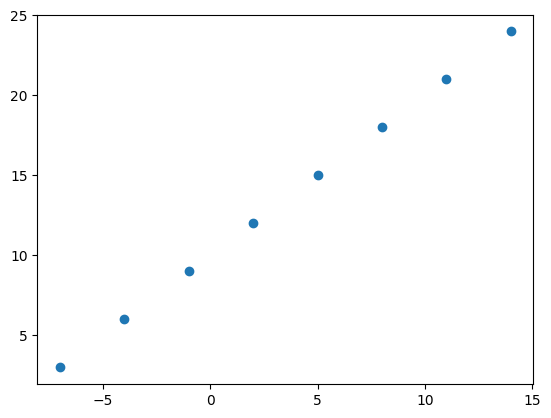

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
# Turn numpy arrays into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y.shape


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 TensorShape([8]))

In [ ]:
input_shape = X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

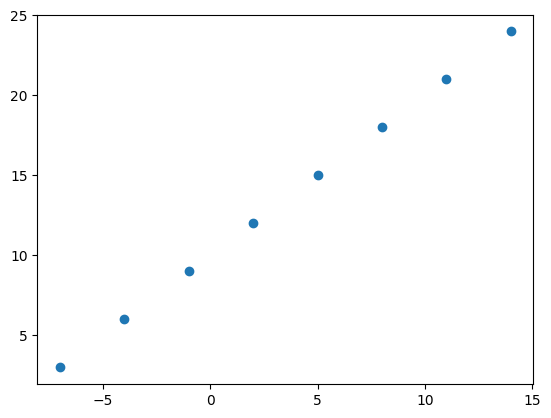

In [ ]:
plt.scatter(X,y)

## Steps in modelling with tensorflow
1. Creating a model - define input and output  layers as well as hidden layers of model
2. Compiling a model - define loss function(tells how wrong model is) and the optimizer(improves model and tells us how to improve) evaluation metrics(gauges how well model performs)
3. Fitting the model(where model learns patterns in data)

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [ ]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 22.0369 - mae: 22.0369
Epoch 2/5
1/1 [==============================] - 0s 40ms/step - loss: 21.6437 - mae: 21.6437
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 21.2506 - mae: 21.2506
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 20.8575 - mae: 20.8575
Epoch 5/5
1/1 [==============================] - 0s 24ms/step - loss: 20.4835 - mae: 20.4835


In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
y_pred = model.predict([11.0])
y_pred

1/1 [==============================] - 0s 212ms/step


array([[-15.629879]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create the model

1. creating a model - here we might add more layers, increase hidden units within each hidden layer, change activation func of layers
2. compiling a model - here we might change optimization function or perhaps the learning rate of the optimization function
3. fitting a model - here we might fit a model for more epochs or on more data

In [ ]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
1/1 [==============================] - 1s 893ms/step - loss: 13.8866 - mae: 13.8866
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 13.7541 - mae: 13.7541
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 13.6216 - mae: 13.6216
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 13.4891 - mae: 13.4891
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 13.3566 - mae: 13.3566
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 13.2241 - mae: 13.2241
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 13.0916 - mae: 13.0916
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: 12.9591 - mae: 12.9591
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 12.8266 - mae: 12.8266
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 12.6941 - mae: 12.6941
Epoch 11/100
1/1 [==============================

In [ ]:
# Lets see if pred has improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 351ms/step


array([[29.942139]], dtype=float32)

In [ ]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 13.9658 - mae: 13.9658
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.3356 - mae: 13.3356
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.7077 - mae: 12.7077
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 12.0773 - mae: 12.0773
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 11.4408 - mae: 11.4408
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 10.7953 - mae: 10.7953
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 10.1376 - mae: 10.1376
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 9.4650 - mae: 9.4650
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 8.7749 - mae: 8.7749
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0647 - mae: 8.0647
Epoch 11/100
1/1 [==============================] - 0s 17

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Lets see if pred has improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 304ms/step


array([[26.930693]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll go through when building a neural network is:

``` build a model -> fit it -> evaluate it -> tweak a model -> evaluate it -> repeat

When it comes to evaluation experiment experiment experiment
When it comes to evaluation it's
> visualization, visualization, visualization
It's a good idea to visualize
* The data - imagine what it looks like
* The model itself - what does our model look like?
* The training of a model - how does model perform while it learns?
* The predictions of the model - how do predictions line up with the ground truth

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the datase
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

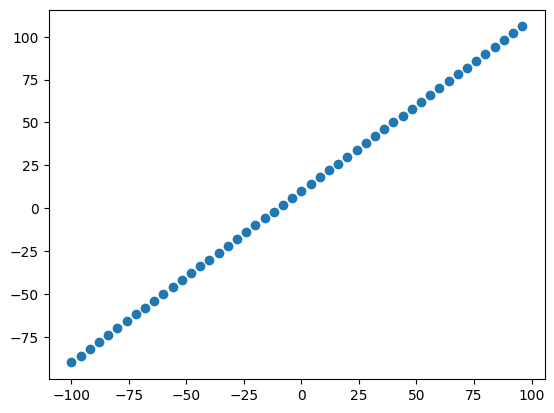

In [ ]:
# visualize the data
plt.scatter(X,y)

### The 3 sets....

* **Training** - the model used to train the data, usually 70 - 80 % of the total amount of data
* **Validation** - Used to validate how well the model performs usually around 10% of the total available data
* **Test** - provides an unbiased account of how well the model is performing usually 10 - 15 % of the total available data

We want the model to be able to generalize - performs well on data which the model hasn't seen before and learns generalised patterns within the data

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got the data in training and test sets... let's visualize it again!

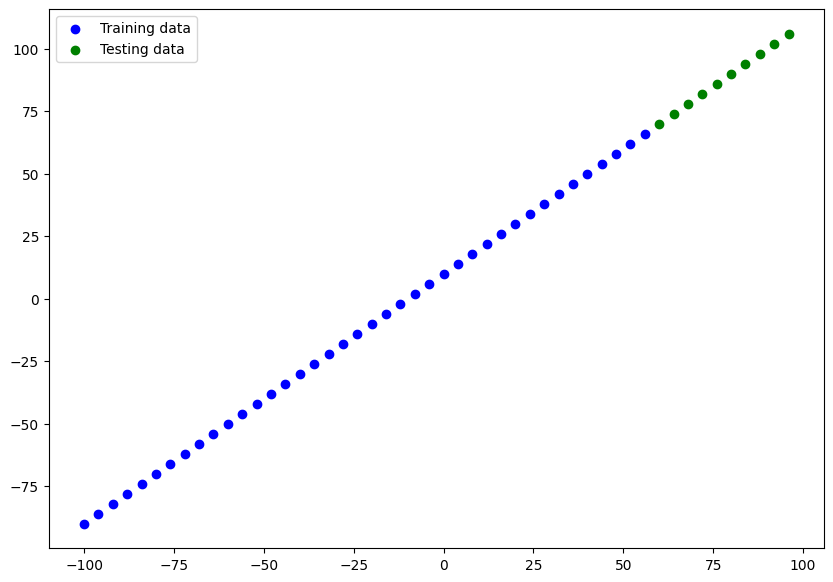

In [ ]:
plt.figure(figsize=(10,7))

# plot the training data in blue
plt.scatter(X_train,y_train, c='b',label="Training data")
plt.scatter(X_test, y_test, c="g",label=("Testing data"))
plt.legend()

# Let's have a look at how to build a neural network with our data

In [ ]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 96.5149 - mae: 96.5149
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 46.8268 - mae: 46.8268
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 9.9734 - mae: 9.9734
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 12.3977 - mae: 12.3977
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 15.5455 - mae: 15.5455
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 11.8591 - mae: 11.8591
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1764 - mae: 9.1764
Epoch 8/100
2/2 [==============================] - 0s 18ms/step - loss: 13.6410 - mae: 13.6410
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 13.8876 - mae: 13.8876
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 10.0261 - mae: 10.0261
Epoch 11/100
2/2 [==============================] - 0s

# Visualizing the model

In [ ]:
model.build()

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
# create a model same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,name="output_layer")
], name="One_of_the_many_models_we_will_build")
# compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),metrics=["mae"])
#fit the model
model.summary()

Model: "One_of_the_many_models_we_will_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total parameters** - total nums of parameters in the model
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains
* **Non-trainable params** - these parameters aren't updated during training(this usually occurs during transfer learning)

** Resource ** For more in depth overview of trainable parameters within a layer checkout MIT's intro to deep-learning video http://introtodeeplearning.com/

In [ ]:
# lets fit our model to the training data
model.fit(X_train,y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "One_of_the_many_models_we_will_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


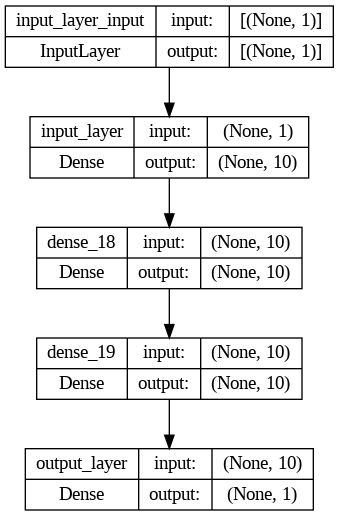

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test`or `y_true`vs `y_pred`(ground truth versus models prediction's)

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 67ms/step


array([[ 74.209435],
       [ 79.059845],
       [ 83.91026 ],
       [ 88.760666],
       [ 93.61108 ],
       [ 98.4615  ],
       [103.311905],
       [108.16232 ],
       [113.01274 ],
       [117.86315 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** if you feel like you're going to reuse a piece of code turn it into function

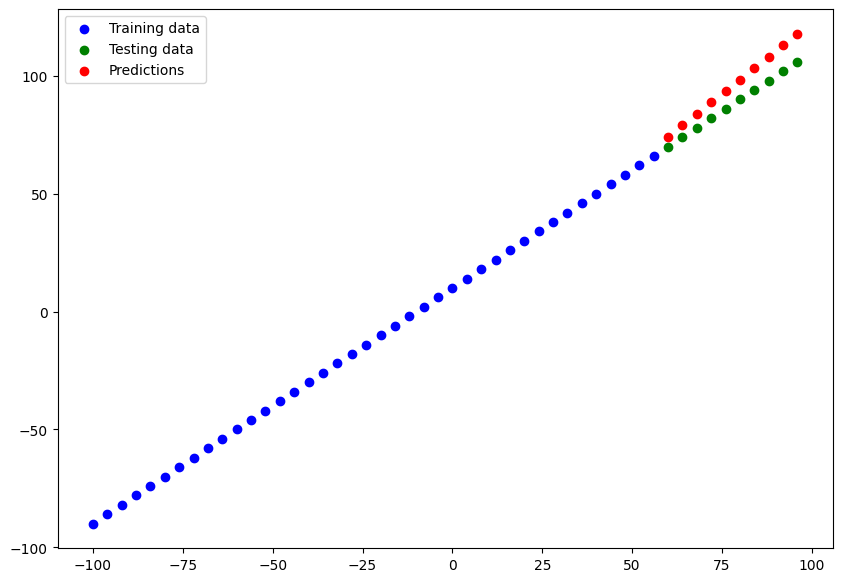

In [ ]:
# let's create a plotting function
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  """
  Plots training data, test data, and compares predictions to ground truth
  """
  plt.figure(figsize=[10,7])
  # Training data
  plt.scatter(train_data,train_labels,c="blue",label="Training data")
  # Test data
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # plot predictions
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.  

Since we're working on regression problems, two of the main metrics we will use are:

* MAE - mean absolute error: on average, how wrong are our predictions
* MSE - mean squared error: square of average errors

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 314ms/step - loss: 8.0363 - mae: 8.0363


[8.036293029785156, 8.036293029785156]

In [143]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))
print(mae)

tf.Tensor(8.036291, shape=(), dtype=float32)


In [144]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 74.209435,  79.059845,  83.91026 ,  88.760666,  93.61108 ,
        98.4615  , 103.311905, 108.16232 , 113.01274 , 117.86315 ],
      dtype=float32)>

In [145]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [146]:
# needed to be done for both mae and mse as they weren't of the same shame(10,1) for y_pred vs (10,) for y_test
y_pred = tf.squeeze(y_pred)

In [147]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.constant(y_pred))
print(mse)

tf.Tensor(70.548386, shape=(), dtype=float32)


In [148]:
def mean_absolute_error(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))

def mean_squared_error(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.constant(y_pred))
